In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total_steps= 5000
dt= 0.1
stim_steps= [ 1000, 1050, 2060, 2070 ]

<IPython.core.display.Javascript object>


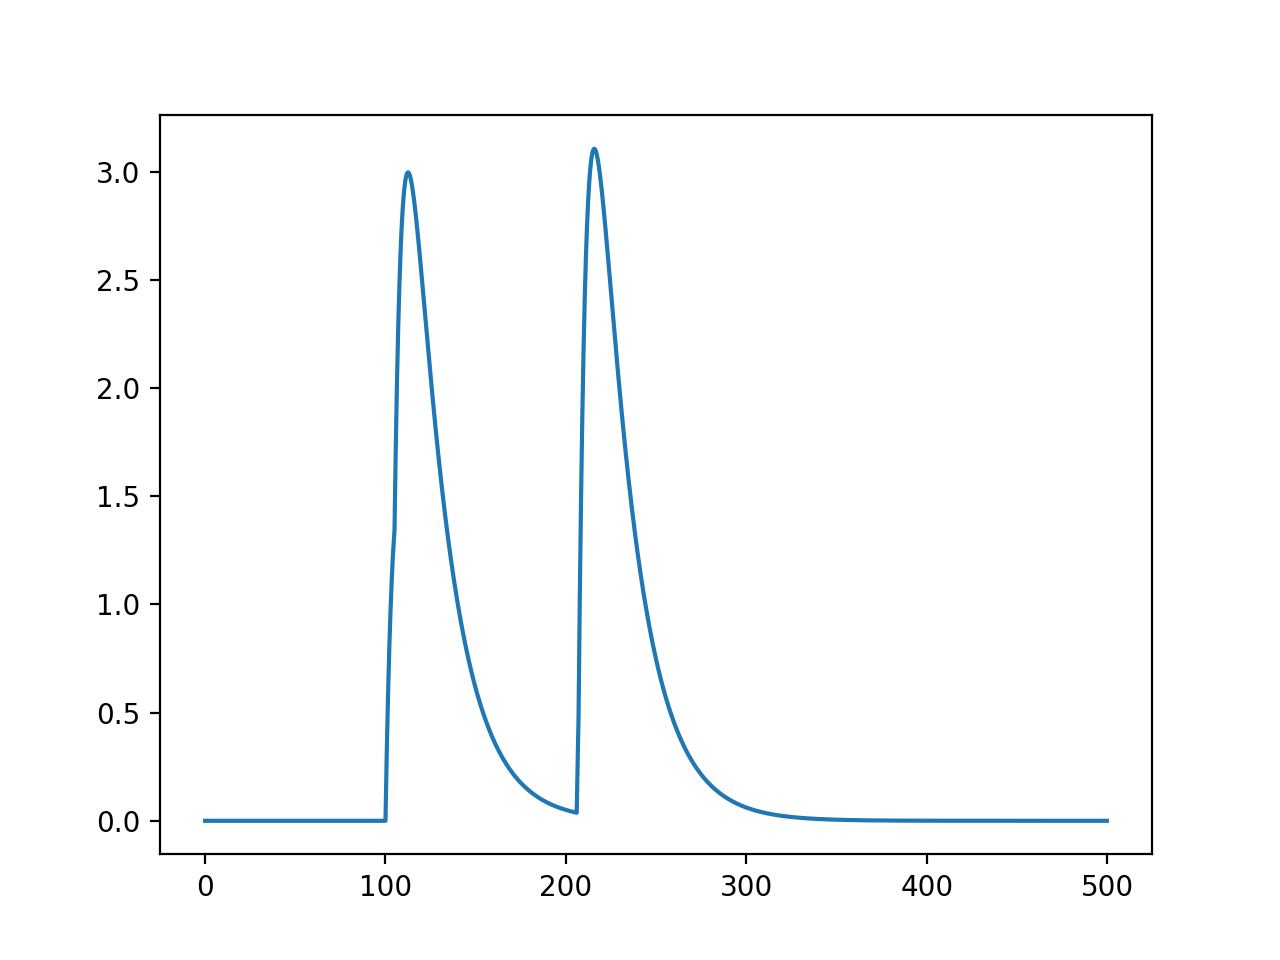

In [6]:
V= 0.0
I= 0.0
w= 10.0
tau_m= 20.0
tau_s= 5.0
V_rec= np.zeros(total_steps)
for iT in range(total_steps):
    #V= V+1.0/tau_m*(I-V)*dt
    V= tau_s/(tau_m-tau_s)*I*(np.exp(-dt/tau_m)-np.exp(-dt/tau_s))+V*np.exp(-dt/tau_m)
    if iT in stim_steps:
        I= I+w
    I= I*np.exp(-dt/tau_s)
    V_rec[iT]= V
    
plt.figure()
plt.plot(np.arange(total_steps)*dt,V_rec)

<IPython.core.display.Javascript object>


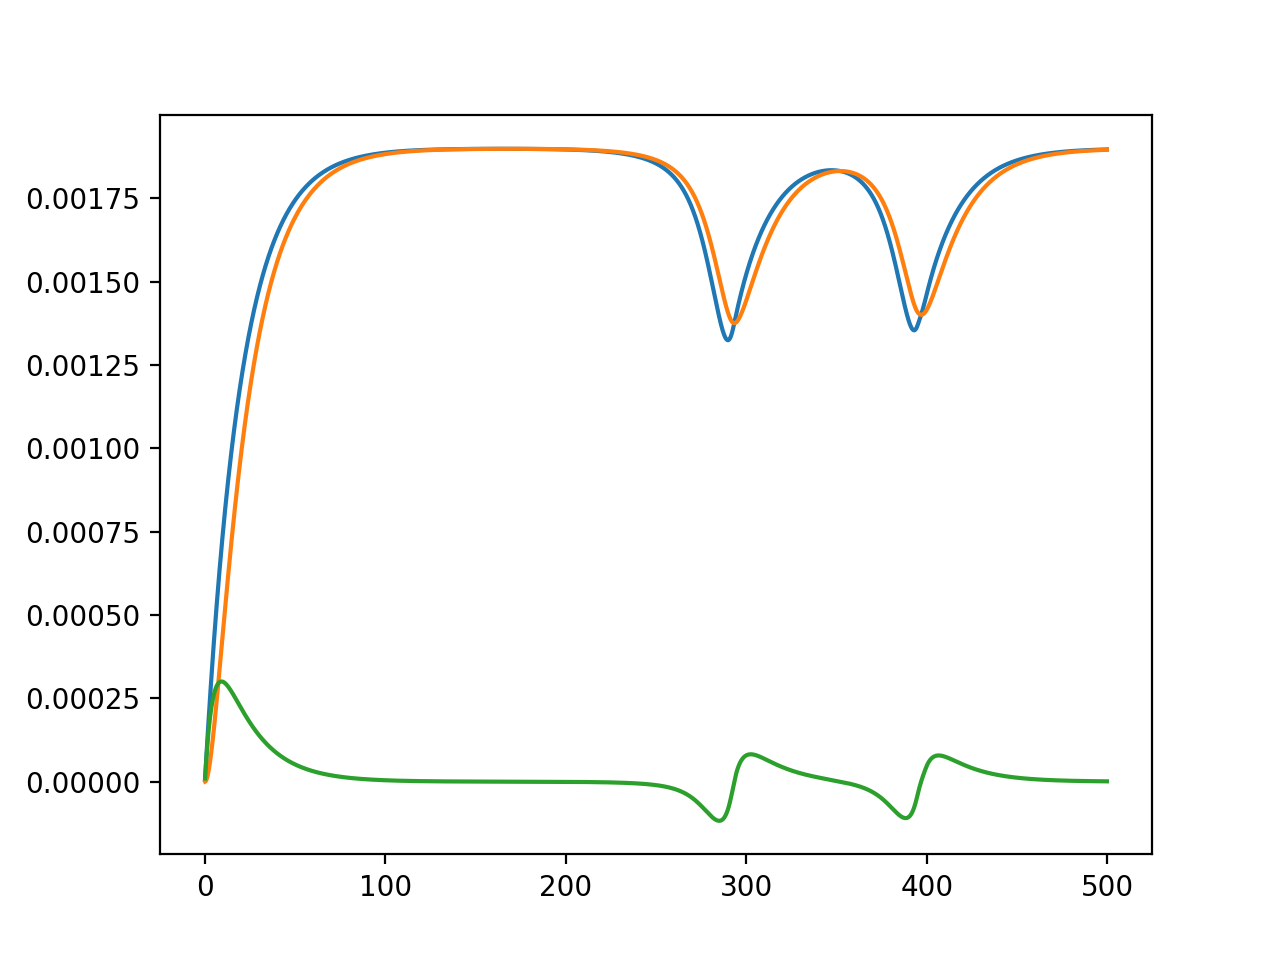

[4000 3950 2940 2930]
[ 4.68685805e-05 -3.81434290e-05  1.58191662e-05 -8.62872798e-06]
1.5915589703910512e-05


In [7]:
lambda_V= 0.0
lambda_I= 0.0
lbdv_rec= []
lbdi_rec= []
for iT in range(total_steps,0,-1):
    lambda_I = lambda_I + (lambda_V - lambda_I)/tau_s*dt;
    lbdv= lambda_V
    mexp= np.exp(V_rec[iT-1])+19
    lambda_V= lambda_V + (1.0-np.exp(V_rec[iT-1])/mexp)/tau_m/total_steps
    lambda_V= lambda_V-lbdv/tau_m*dt
    lbdv_rec.append(lambda_V)
    lbdi_rec.append(lambda_I)
    
lbdv_rec= np.array(lbdv_rec)
lbdi_rec= np.array(lbdi_rec)

plt.figure()
plt.plot(np.arange(total_steps)*dt,lbdv_rec)
plt.plot(np.arange(total_steps)*dt,lbdi_rec)
plt.plot(np.arange(total_steps)*dt,lbdv_rec-lbdi_rec)
pos= total_steps-np.array(stim_steps)
print(pos)
print(lbdv_rec[pos]-lbdi_rec[pos])
print(sum(lbdv_rec[pos]-lbdi_rec[pos]))

Look at the back-propagated lambda for cross-entropy of integrals loss
---

<IPython.core.display.Javascript object>


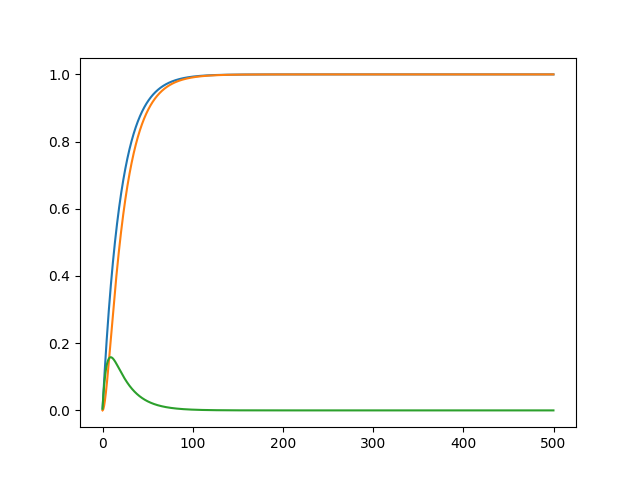

49.99999999913462


In [6]:
tau_m= 20.0
tau_s= 5.0
lambda_V= 0.0
lambda_I= 0.0
lbdv_rec= []
lbdi_rec= []
for iT in range(total_steps,0,-1):
    lambda_I = lambda_I + (lambda_V - lambda_I)/tau_s*dt
    lambda_V = lambda_V + (1-lambda_V)/tau_m*dt
    lbdv_rec.append(lambda_V)
    lbdi_rec.append(lambda_I)
lbdv_rec= np.array(lbdv_rec)
lbdi_rec= np.array(lbdi_rec)

plt.figure()
plt.plot(np.arange(total_steps)*dt,lbdv_rec)
plt.plot(np.arange(total_steps)*dt,lbdi_rec)
plt.plot(np.arange(total_steps)*dt,lbdv_rec-lbdi_rec)
print(sum(lbdv_rec-lbdi_rec))